In [8]:
import numpy as np
import pandas as pd
import matplotlib
import os
import datetime
from datetime import date
from datetime import time
from datetime import datetime
import seaborn as sns
path = 'C:/Users/anirima.ghosh/Documents/system'
os.chdir(path)
os.getcwd()
normal  = pd.read_csv('Genesis_normal.csv', sep =',')
anomaly = pd.read_csv('Genesis_lineardrive.csv',sep = ',')
data = pd.read_csv('data.csv', sep = ',')
normal['label1']= normal['label'].factorize()[0]
anomaly['label1'] = anomaly['label'].factorize()[0]
data['label1'] = data['label'].factorize()[0]



In [ ]:
#normal.dtypes
#MotorData.ActCurrent 
#MotorData.IsForce
#MotorData.Motor_Pos4reached
#MotorData.SetCurrent
#MotorData.SetForce
#MotorData.SetSpeed
#NVL_Recv_Storage.GL_X_TimeSlideIn
#NVL_Recv_Storage.GL_X_TimeSlideOut
#normal anomaly data

########################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
f = plt.figure(figsize=(10,6))
ax = sns.distplot(normal['NVL_Recv_Storage.GL_X_TimeSlideOut'])
f.savefig("GL_X_TimeSlideOut_normal.png", bbox_inches='tight')
############################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
f = plt.figure(figsize=(10,6))
ax = sns.distplot(anomaly['NVL_Recv_Storage.GL_X_TimeSlideOut'])
f.savefig("NVL_Recv_Storage.GL_X_TimeSlideOut_anomaly.png", bbox_inches='tight')

import seaborn as sns
from matplotlib import pyplot as plt
ax = data1.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
pyplot.show()

import seaborn as sns
from matplotlib import pyplot as plt

ax = normal1.plot(kind = 'box', subplots= True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
pyplot.show()
f.savefig("box plot for normal.png", bbox_inches = 'tight' )

sns.boxplot(data= data1, x = 'NVL_Recv_Storage.GL_X_TimeSlideOut')
plt.show()

In [9]:
## detect outliers

names = ['MotorData.ActCurrent', 'MotorData.IsForce', 'MotorData.Motor_Pos4reached','MotorData.SetCurrent', 'MotorData.SetForce',
        'MotorData.SetSpeed', 'NVL_Recv_Storage.GL_X_TimeSlideIn','NVL_Recv_Storage.GL_X_TimeSlideOut']
normal1 = normal[names]
anomaly1 = anomaly[names]
data1 = data[names]


In [5]:
normal1.dtypes

MotorData.ActCurrent                  int64
MotorData.IsForce                     int64
MotorData.Motor_Pos4reached           int64
MotorData.SetCurrent                  int64
MotorData.SetForce                    int64
MotorData.SetSpeed                    int64
NVL_Recv_Storage.GL_X_TimeSlideIn     int64
NVL_Recv_Storage.GL_X_TimeSlideOut    int64
dtype: object

In [10]:
from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit(data1)
df_final = df.transform(data1)
imputed_df = pd.DataFrame(df_final, columns = data1.columns)
target = data['label']
final_df = pd.concat([target, imputed_df], axis = 1 )

In [11]:
## leave one out cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array = final_df.values
Y = array[:,0]
X = array[:,1:8]
loocv = LeaveOneOut()
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=loocv)
print((results.mean()*100.0))



58.62140486725663


In [12]:
final_df.dtypes

label                                   int64
MotorData.ActCurrent                  float64
MotorData.IsForce                     float64
MotorData.Motor_Pos4reached           float64
MotorData.SetCurrent                  float64
MotorData.SetForce                    float64
MotorData.SetSpeed                    float64
NVL_Recv_Storage.GL_X_TimeSlideIn     float64
NVL_Recv_Storage.GL_X_TimeSlideOut    float64
dtype: object

In [103]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model,8 )
fit = rfe.fit(X, Y)


In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import  cross_val_score
from sklearn.linear_model import LogisticRegression
array = final_df.values
Y = array[:,0]
X = array[:,1:8]
num_fold = 10
kfold = KFold(n_splits = 100, random_state = 7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv = kfold )
print(results.mean())

0.5711786398467432


In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import  cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
array = final_df.values
Y = array[:,0]
X = array[:,1:8]
num_fold = 10
kfold = KFold(n_splits = 100, random_state = 70)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv = kfold )
print(results.mean())

0.5588999042145594


In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import  cross_val_score
from sklearn.neighbors import KNeighborsClassifier
array = final_df.values
Y = array[:,0]
X = array[:,1:8]
num_fold = 10
kfold = KFold(n_splits = 100, random_state = 70)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv = kfold )
print(results.mean())

0.8724909003831418


In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
array = final_df.values
Y = array[:,0]
X = array[:,1:8]
kfold = KFold(n_splits= 100, random_state= 70)
model = SVC()
results = cross_val_score(model, X,Y, cv = kfold)
print(results.mean())

0.8040038314176244


In [16]:
cols = ['MotorData.ActCurrent', 'MotorData.IsForce', 'MotorData.Motor_Pos4reached','MotorData.SetCurrent', 'MotorData.SetForce',
        'MotorData.SetSpeed', 'NVL_Recv_Storage.GL_X_TimeSlideIn','NVL_Recv_Storage.GL_X_TimeSlideOut']

X = final_df[cols]
Y = final_df['label']


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size = 0.3, random_state = 0)
knn = KNeighborsClassifier(n_neighbors= 5, leaf_size= 50)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test, Y_test)))


Accuracy of KNN classifier on test set: 0.90


In [22]:
## metrics of the classifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)
print (classification_report(Y_test, Y_pred))


[[1872  209]
 [ 214 2045]]
             precision    recall  f1-score   support

          0       0.90      0.90      0.90      2081
          1       0.91      0.91      0.91      2259

avg / total       0.90      0.90      0.90      4340



label                                   int64
MotorData.ActCurrent                  float64
MotorData.IsForce                     float64
MotorData.Motor_Pos4reached           float64
MotorData.SetCurrent                  float64
MotorData.SetForce                    float64
MotorData.SetSpeed                    float64
NVL_Recv_Storage.GL_X_TimeSlideIn     float64
NVL_Recv_Storage.GL_X_TimeSlideOut    float64
dtype: object

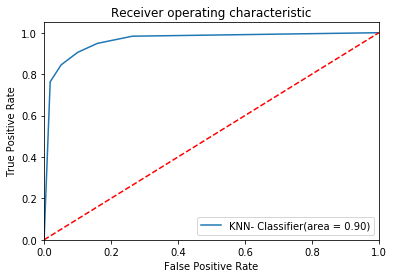

In [19]:
##ROC  Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
knn_roc_auc = roc_auc_score(Y_test, knn.predict(X_test))
fpr, tpr, thresolds = roc_curve(Y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'KNN- Classifier(area = %0.2f)'% knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('C:/Users/anirima.ghosh/Documents/system/knn_roc.png')


In [20]:
# plot
import statsmodels.api as sm
logit_model = sm.Logit(Y_train, X_train)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.663103
         Iterations 9
                                  Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.043      
Dependent Variable:       label                 AIC:                   13442.5103 
Date:                     2018-10-31 11:33      BIC:                   13500.2917 
No. Observations:         10124                 Log-Likelihood:        -6713.3    
Df Model:                 7                     LL-Null:               -7015.3    
Df Residuals:             10116                 LLR p-value:           3.1229e-126
Converged:                1.0000                Scale:                 1.0000     
No. Iterations:           9.0000                                                  
----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------

In [26]:
final_df.head()

#final_df['label1'] = np.where(final_df['label']== 1, 'yes', 'no')

,label,MotorData.ActCurrent,MotorData.IsForce,MotorData.Motor_Pos4reached,MotorData.SetCurrent,MotorData.SetForce,MotorData.SetSpeed,NVL_Recv_Storage.GL_X_TimeSlideIn,NVL_Recv_Storage.GL_X_TimeSlideOut,label1
0,0,0.753327,0.758604,1.810881,0.739101,0.73123,0.088075,8.958637,0.549464,no
1,0,0.745941,0.750188,1.810881,0.739101,0.73123,0.088075,8.958637,0.549464,no
2,0,0.745941,0.750188,1.810881,0.739101,0.73123,0.088075,8.958637,0.549464,no
3,0,0.769947,0.758604,1.810881,0.739101,0.73123,0.088075,8.958637,0.549464,no
4,0,0.753327,0.750188,1.810881,0.739101,0.73123,0.088075,8.958637,0.549464,no


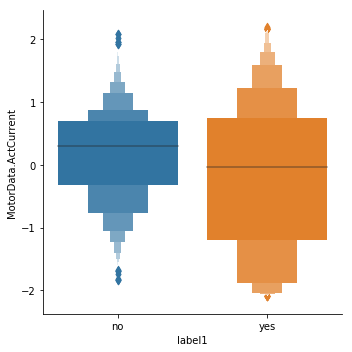

In [29]:
##  MotorData.ActCurrent
##  MotorData.SetCurrent
##  MotorData.SetSpeed
##  NVL_Recv_Storage.GL_X_TimeSlideIn
##  NVL_Recv_Storage.GL_X_TimeSlideOut
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

plt = sns.catplot( x= 'label1' , y = "MotorData.ActCurrent", data = final_df, kind = 'boxen')
#plt.show()
plt.savefig('C:/Users/anirima.ghosh/Documents/system/ActCurrent.png', bbox_inches = 'tight')

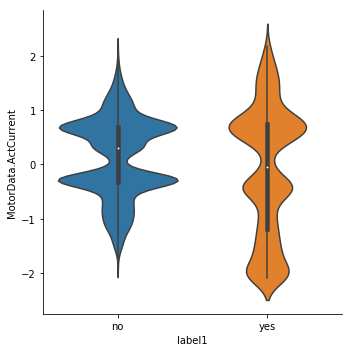

<Figure size 432x288 with 0 Axes>

In [28]:
##  MotorData.ActCurrent
##  MotorData.SetCurrent
##  MotorData.SetSpeed
##  NVL_Recv_Storage.GL_X_TimeSlideIn
##  NVL_Recv_Storage.GL_X_TimeSlideOut
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
#final_df['label2'] = np.where(final_df['label']== 1, 'yes', 'no')
plt = sns.catplot( x= 'label1' , y = "MotorData.ActCurrent", data = final_df, kind = "violin")
#plt.show()
plt.savefig('C:/Users/anirima.ghosh/Documents/system/ActCurrent_violin.png', bbox_inches='tight')

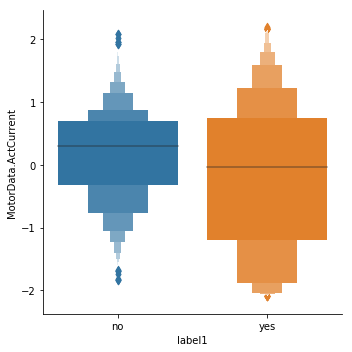

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

sns.catplot(x="label1", y="MotorData.ActCurrent", kind="boxen", data = final_df)
            
plt.show()

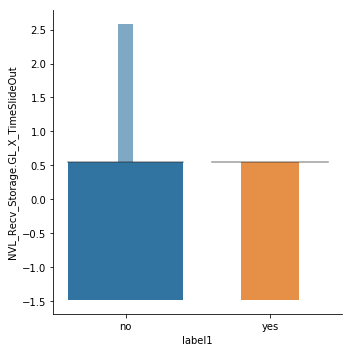

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

plt = sns.catplot(x="label1", y="NVL_Recv_Storage.GL_X_TimeSlideOut", kind="boxen", data = final_df)
            
#plt.show()
plt.savefig('C:/Users/anirima.ghosh/Documents/system/GL_X_TimeSlideOut.png', bbox_inches='tight')

In [7]:
final_df['label1'] = np.where(final_df['label'] == 1, 'yes', 'no')

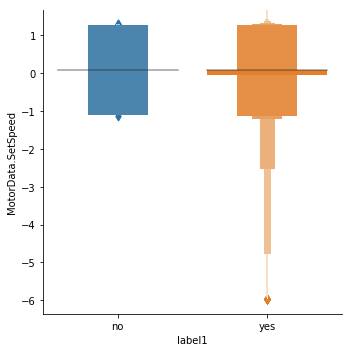

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt


plt = sns.catplot(x="label1", y="MotorData.SetSpeed", kind="boxen", data = final_df)
            
#plt.show()
plt.savefig('C:/Users/anirima.ghosh/Documents/system/SetSpeed.png', bbox_inches='tight')

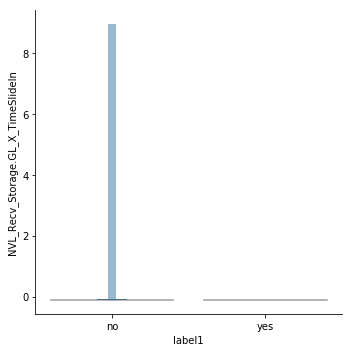

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt


plt = sns.catplot(x="label1", y="NVL_Recv_Storage.GL_X_TimeSlideIn", kind="boxen", data = final_df)
            
#plt.show()
plt.savefig('C:/Users/anirima.ghosh/Documents/system/TimeSlideIn.png', bbox_inches='tight')

In [36]:
final_df.dtypes

label                                   int64
MotorData.ActCurrent                  float64
MotorData.IsForce                     float64
MotorData.Motor_Pos4reached           float64
MotorData.SetCurrent                  float64
MotorData.SetForce                    float64
MotorData.SetSpeed                    float64
NVL_Recv_Storage.GL_X_TimeSlideIn     float64
NVL_Recv_Storage.GL_X_TimeSlideOut    float64
label1                                 object
dtype: object

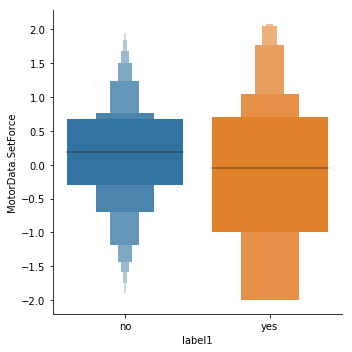

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt


plt = sns.catplot(x="label1", y="MotorData.SetForce", kind="boxen", data = final_df)
            
#plt.show()
plt.savefig('C:/Users/anirima.ghosh/Documents/system/SetForce.png', bbox_inches='tight')

## TRY ISOLATION FOREST FOR ANOMALY DETECTION
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
clf = IsolationForest(n_estimators =100, max_samples = 200)
y_pred_train = clf.fit(X_train)
y_pred_test = clf.predict(X_test)
print( "accuracy", list(y_pred_test).count(1)/y_pred_test.shape[0])

In [58]:
##TRY ISOLATION FOREST FOR ANOMALY DETECTION

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0) 
clf = IsolationForest(n_estimators =100, max_samples = 250) 
y_pred_train = clf.fit(X_train) 
y_pred_test = clf.predict(X_test)
print( "accuracy", list(y_pred_test).count(1)/y_pred_test.shape[0])


accuracy 0.8894009216589862


In [77]:
score_pred_train = clf.decision_function(X_train)
score_pred_test = clf.decision_function(X_test)

In [79]:
X_train['anomaly_score'] = score_pred_train
X_test['anomaly_score'] = score_pred_test



C:\Users\anirima.ghosh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\anirima.ghosh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [84]:
X_train.to_csv('C:/Users/anirima.ghosh/Documents/system/X_train.csv', sep = ',')
X_test.to_csv('C:/Users/anirima.ghosh/Documents/system/X_test.csv', sep = ',')
Y_train.to_csv('C:/Users/anirima.ghosh/Documents/system/Y_train.csv', sep = ',')
Y_test.to_csv('C:/Users/anirima.ghosh/Documents/system/Y_test.csv', sep = ',')

In [61]:
cols = ['MotorData.ActCurrent', 'MotorData.IsForce', 'MotorData.Motor_Pos4reached','MotorData.SetCurrent', 'MotorData.SetForce',
        'MotorData.SetSpeed', 'NVL_Recv_Storage.GL_X_TimeSlideIn','NVL_Recv_Storage.GL_X_TimeSlideOut', 'label']



In [64]:
## TRY ISOLATION FOREST on the entire data set
from sklearn.ensemble import IsolationForest
clf1 = IsolationForest()
y_pred = clf1.fit(final_df1)

In [67]:
scores_pred = clf1.decision_function(final_df1)
final_df1['anomaly_score'] = scores_pred


In [66]:
scores_pred

array([-0.0626153 , -0.06526123, -0.06526123, ...,  0.06206436,
        0.06209472,  0.06209472])

In [68]:
final_df1['label1'] = np.where(final_df1['label']== 1, 'yes', 'no')

In [70]:
final_df1.to_csv('C:/Users/anirima.ghosh/Documents/system/system_anomaly.csv', sep = ',')

In [71]:
# For convinience, divide the dataframe cc based on two labels. 
avg_count_0 = final_df1.loc[final_df1.label==0]    #Data frame with normal observation
avg_count_1 = final_df1.loc[final_df1.label==1]    #Data frame with anomalous observation

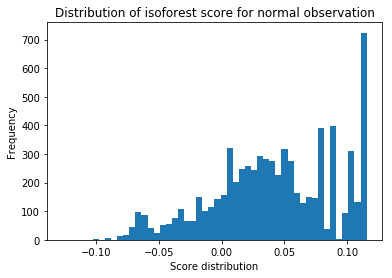

In [72]:
#Plot the combined distribution of the scores 
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

normal = plt.hist(avg_count_0.anomaly_score, 50,)
plt.xlabel('Score distribution')
plt.ylabel('Frequency')
plt.title("Distribution of isoforest score for normal observation")
plt.show()

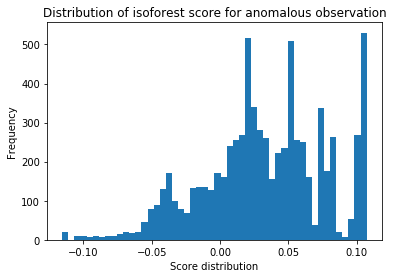

In [73]:
#Plot the combined distribution of the scores 
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

normal = plt.hist(avg_count_1.anomaly_score, 50,)
plt.xlabel('Score distribution')
plt.ylabel('Frequency')
plt.title("Distribution of isoforest score for anomalous observation")
plt.show()